# Setup

In [ ]:
!git clone -b py_lib --single-branch https://github.com/SparkBL/simulation_vkr_cli.git

In [ ]:
!apt --fix-broken install
!apt-get install gcc-8 g++-8 -y -qq;
!rm /usr/bin/gcc
!rm /usr/bin/g++

!ln -s /usr/bin/gcc-8 /usr/bin/gcc
!ln -s /usr/bin/g++-8 /usr/bin/g++
!gcc -v

In [ ]:
%%bash
cd ./simulation_vkr_cli/
export CC=/usr/bin/gcc
pip install ./

In [ ]:
!pip list | grep "rq-analysis"

#Update

In [ ]:
pip uninstall -y rq_analysis

In [ ]:
%%bash
cd ./simulation_vkr_cli/
git pull origin py_lib
export CC=/usr/bin/gccY
pip install .

Все объекты и функции библиотеки имеют описание, доступное при помощи `__doc__`

## SubProcess

In [1]:
import subprocess
import json
import numpy as np
res = []
procs = []
input_intensity_range = np.arange(0.1, 1.0001, 0.1)
orbit_intensity_range = np.arange(0.05, 3.0001, 0.1)
node_intensity_range = np.arange(1.6001, 2.0001, 0.1)

completed_count = 0
m_index = 0
for inp in list(input_intensity_range):
    for orb in list(orbit_intensity_range):
        for nod in list(node_intensity_range):
            procs.append(subprocess.Popen(' '.join(['python','run.py',str(inp),str(orb),str(nod)]),shell=True))
            m_index +=1
            if m_index>100:
                procs[0].wait()
                m_index-=1
                procs.pop(0)
                completed_count+=1
                print(f'Completed: {completed_count}',end="\r",flush=True)
    

for p in procs:
    p.wait()
    completed_count+=1
    print(f'Completed: {completed_count}',end="\r",flush=True)

In [2]:
for inp in list(input_intensity_range):
    for orb in list(orbit_intensity_range):
        for nod in list(node_intensity_range):
            with open(f'results/mod_{inp}_{orb}_{nod}.json','r',encoding='utf-8') as ff:
                res.append(json.load(ff))


In [22]:
df.to_csv('example_200k.csv')

In [1]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
#df = pd.DataFrame(res)
df = pd.read_csv('example_200k.csv')

In [2]:
df = df.drop('Unnamed: 0',axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   input_intensity  1500 non-null   float64
 1   orbit_intesity   1500 non-null   float64
 2   node_intensity   1500 non-null   float64
 3   os_distr         1500 non-null   object 
 4   os_mean          1500 non-null   float64
 5   os_std           1500 non-null   float64
 6   os_var           1500 non-null   float64
 7   os_q95           1500 non-null   object 
 8   os_q99           1500 non-null   object 
 9   wt_distr         1500 non-null   object 
 10  wt_bins          1500 non-null   object 
 11  wt_mean          1500 non-null   float64
 12  wt_std           1500 non-null   float64
 13  wt_var           1500 non-null   float64
 14  wt_q95           1500 non-null   float64
 15  wt_q99           1500 non-null   float64
dtypes: float64(11), object(5)
memory usage: 187.6+ KB


In [8]:
df.head()

,input_intensity,orbit_intesity,node_intensity,os_distr,os_mean,os_std,os_var,os_q95,os_q99,wt_distr,wt_bins,wt_mean,wt_std,wt_var,wt_q95,wt_q99
0,0.1,0.05,1.6001,"[0.13607711172592435, 0.2713079780796354, 0.26...",2.043688,1.487058,0.727635,"[12, 0.0]","[10, 8.89695810153605e-05]","[0.5048660579913715, 0.014949332798234172, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",20.394972,35.386050,1.735038,94.608493,159.138683
1,0.1,0.05,1.7001,"[0.1437759545385612, 0.26107013564644155, 0.26...",2.035222,1.484292,0.729302,"[12, 0.0]","[10, 7.831052385012022e-05]","[0.505495593623131, 0.011585305475789683, 0.01...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",20.143588,34.627566,1.719037,91.237744,149.757334
2,0.1,0.05,1.8001,"[0.1508161574924063, 0.2699325620957558, 0.259...",1.993872,1.488917,0.746747,"[12, 0.0]","[10, 8.540512696276441e-05]","[0.5061540026446953, 0.013935510121045672, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",20.198488,34.611702,1.713579,93.618346,152.197624
3,0.1,0.05,1.9001,"[0.15512733271708867, 0.27404033744572975, 0.2...",1.968723,1.480282,0.751900,"[12, 0.0]","[10, 0.0002175198789599483]","[0.5133137592386352, 0.012048192771084338, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",19.484796,33.644158,1.726688,89.452310,150.362717
4,0.1,0.05,2.0001,"[0.1468700566520981, 0.2697861128142304, 0.259...",1.997621,1.466231,0.733989,"[11, 0.0]","[10, 9.320751791409032e-05]","[0.5207938565872146, 0.013363917422958014, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",19.316669,33.432851,1.730777,90.159698,146.585765


In [ ]:
print(df[['input_intensity','orbit_intensity','os_mean','wt_mean','os_std','wt_std','os_q99','wt_q99']].head(15).to_latex(float_format="{:.2f}".format))

Распределение размера орбиты

In [9]:
import warnings
warnings.simplefilter(action='ignore')

In [40]:
orb_dict = {}
for index, row in df.iterrows():
    orb_dict[str(index)] = json.loads(row['os_distr'])


df_orbit_size = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in orb_dict.items() ]))


In [41]:
df_orbit_size.head()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0.136077,0.143776,0.150816,0.155127,0.146870,0.498679,0.515296,0.520993,0.519831,0.517816,...,0.219274,0.245067,0.274261,0.295422,0.314823,0.228042,0.250377,0.277086,0.301025,0.323850
1,0.271308,0.261070,0.269933,0.274040,0.269786,0.326808,0.329944,0.320827,0.322416,0.324693,...,0.189631,0.204060,0.217431,0.224032,0.230539,0.190482,0.207354,0.215432,0.224817,0.232054
2,0.262382,0.264437,0.259640,0.255131,0.259609,0.128773,0.116210,0.118538,0.116585,0.118640,...,0.153939,0.162180,0.163781,0.163791,0.161856,0.156019,0.160051,0.163719,0.161339,0.162911
3,0.170982,0.172988,0.169794,0.167466,0.174554,0.035251,0.030573,0.030935,0.032820,0.030384,...,0.120362,0.120622,0.117374,0.113708,0.109770,0.120982,0.119401,0.115782,0.111950,0.108732
4,0.096208,0.093590,0.087374,0.089834,0.089539,0.008699,0.006561,0.006922,0.006971,0.006868,...,0.092143,0.086177,0.079907,0.075782,0.071054,0.090040,0.084195,0.080219,0.074583,0.068839


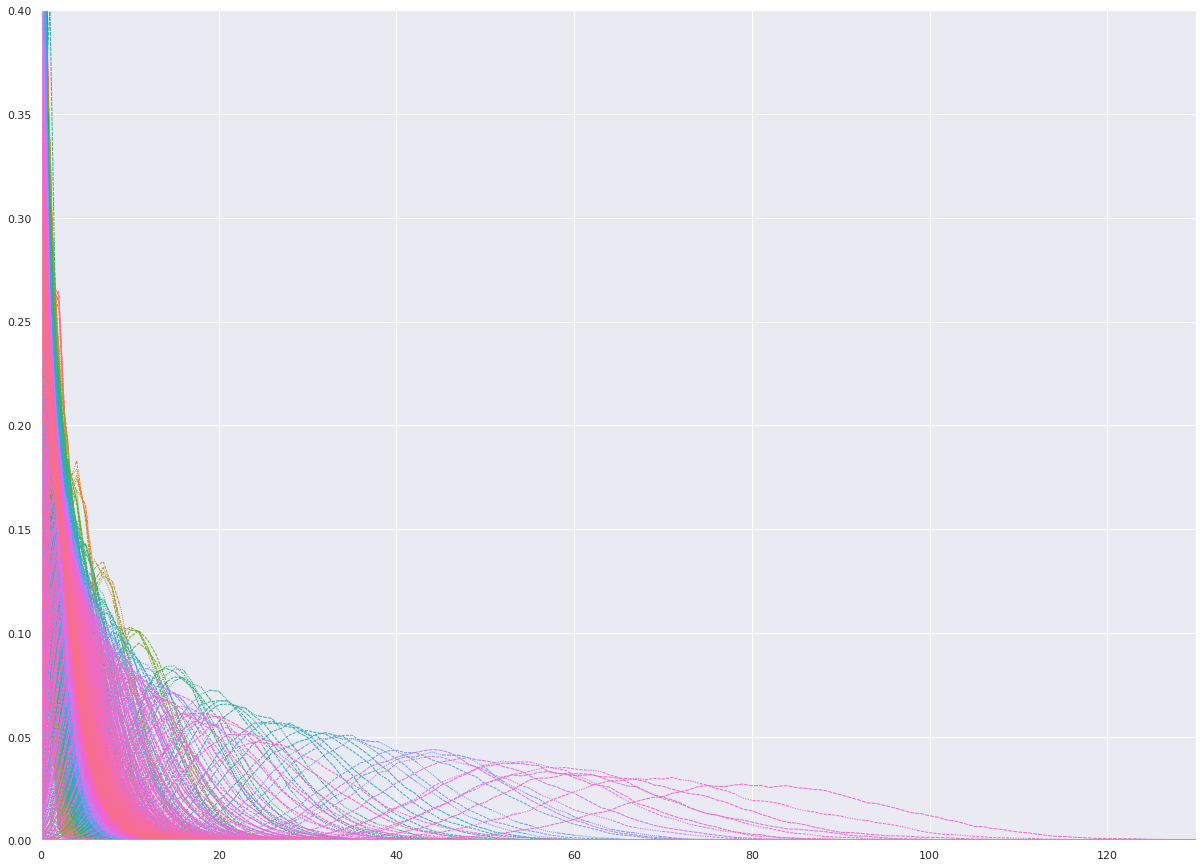

In [51]:
fig, ax = plt.subplots()
fig = sns.lineplot( data=df_orbit_size,lw=1,legend=False,ax=ax)
ax.set_xlim(0, 130)
ax.set_ylim(0, 0.4)
plt.show()

Распределение времени ожидания

In [52]:
wait_dict = {}
for index, row in df.iterrows():
    wait_dict[str(index)] = json.loads(row['wt_distr'])

df_wait_time = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in wait_dict.items() ]))

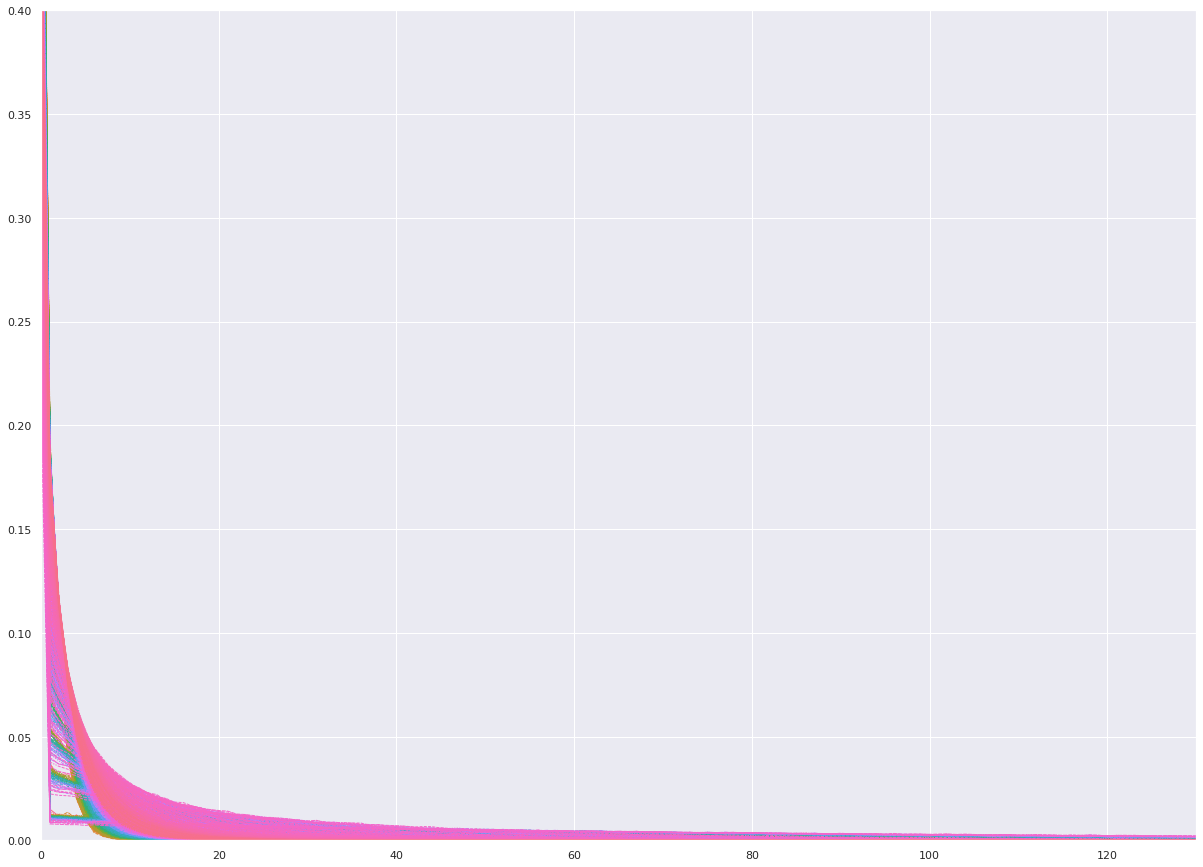

In [53]:
fig, ax = plt.subplots()
fig = sns.lineplot( data=df_wait_time,lw=1,legend=False,ax=ax)
ax.set_xlim(0, 130)
ax.set_ylim(0, 0.4)
plt.show()

In [20]:
df_scatter =  df.select_dtypes(include=['float64','int64'])[[
'input_intensity',
'orbit_intesity',
'node_intensity',
'os_mean',
'os_std',              
#'os_q95',     
#'os_q99',
'os_var',
'wt_mean',  
'wt_std',
'wt_var',        
#'wt_q95',     
#'wt_q99',  
]]

In [ ]:
df_scatter = df_scatter[[(df_scatter['wt_std']<20) & (df_scatter['os_std']>10)]]

In [21]:
df_scatter = df_scatter.dropna(axis=0)
df_scatter = df_scatter.reset_index(drop=True)

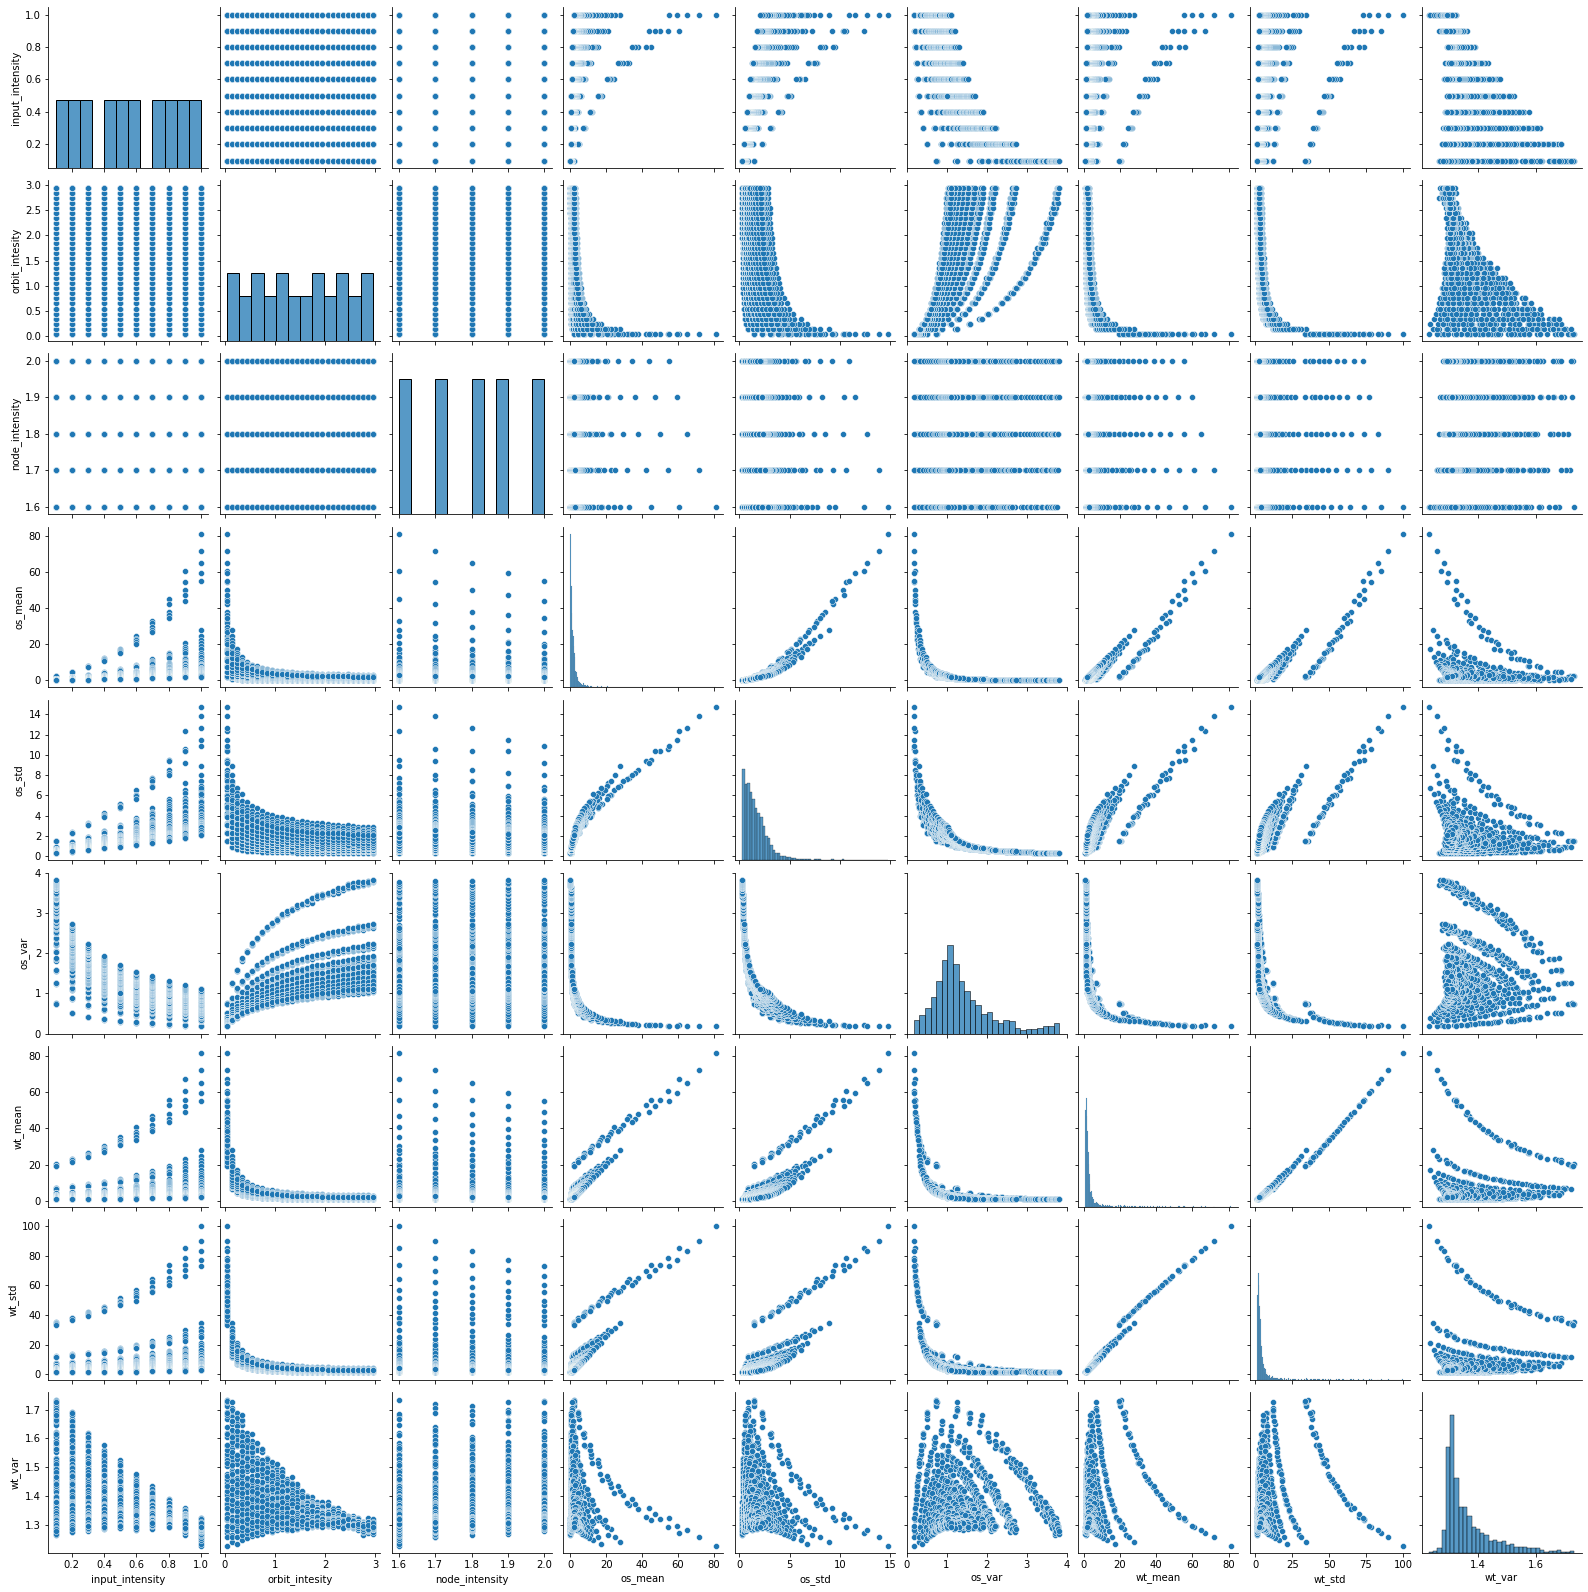

: 

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_scatter)
plt.show()

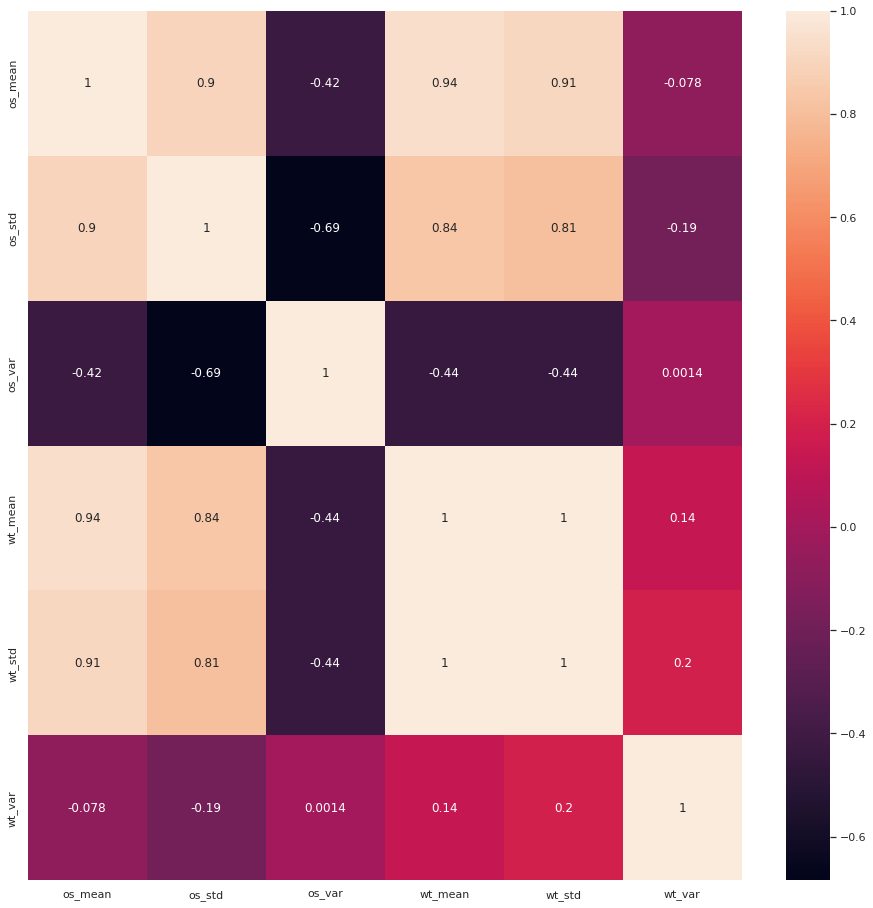

In [59]:
kol_corr_pirson = df_scatter.corr(method='pearson')
plt.figure(figsize = (16,16))
sns.heatmap(kol_corr_pirson[abs(kol_corr_pirson)>0.0], annot = True);